## Exploratory Data Analysis

### Statistics

In [2]:
# Install Dependencies

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(os.path.join('data', 'winequality.csv'))
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [5]:
print("Dimensions:", df.shape)
df.isnull().sum()

Dimensions: (6497, 12)


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.describe(include='all')

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


### Visualisations

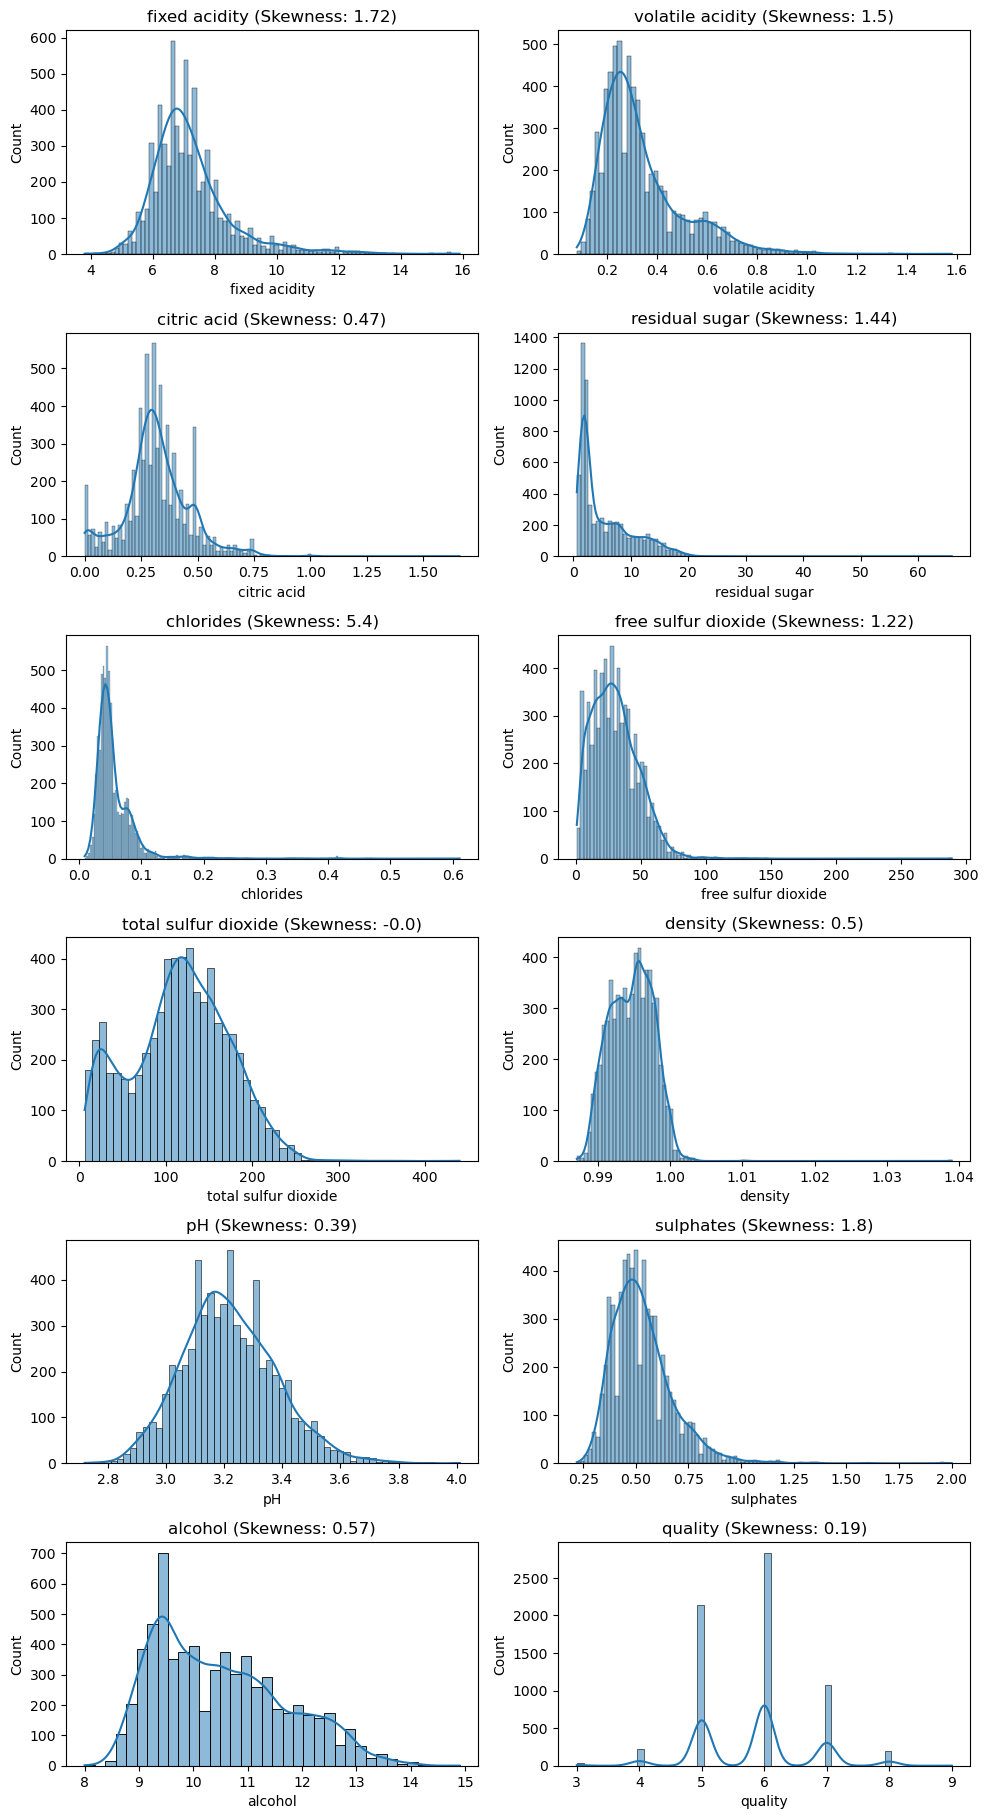

In [ ]:
numerical_col = df.select_dtypes(include=["int64", "float64"]).columns
plt.figure(figsize=(10, len(numerical_col) * 3))
for i, feat in enumerate(numerical_col, 1):
    plt.subplot(len(numerical_col), 2, i)
    sns.histplot(df[feat], kde=True)
    plt.title(f"{feat} (Skewness: {round(df[feat].skew(), 2)})")

plt.tight_layout()

# All features looks good
# fixed acidity, volatile acidity, citric acid, chlorides, free sulfur dioxide, total sulfur dioxide, density, and sulphates need outlier trimming
# residual sugar and alcohol may need log transform

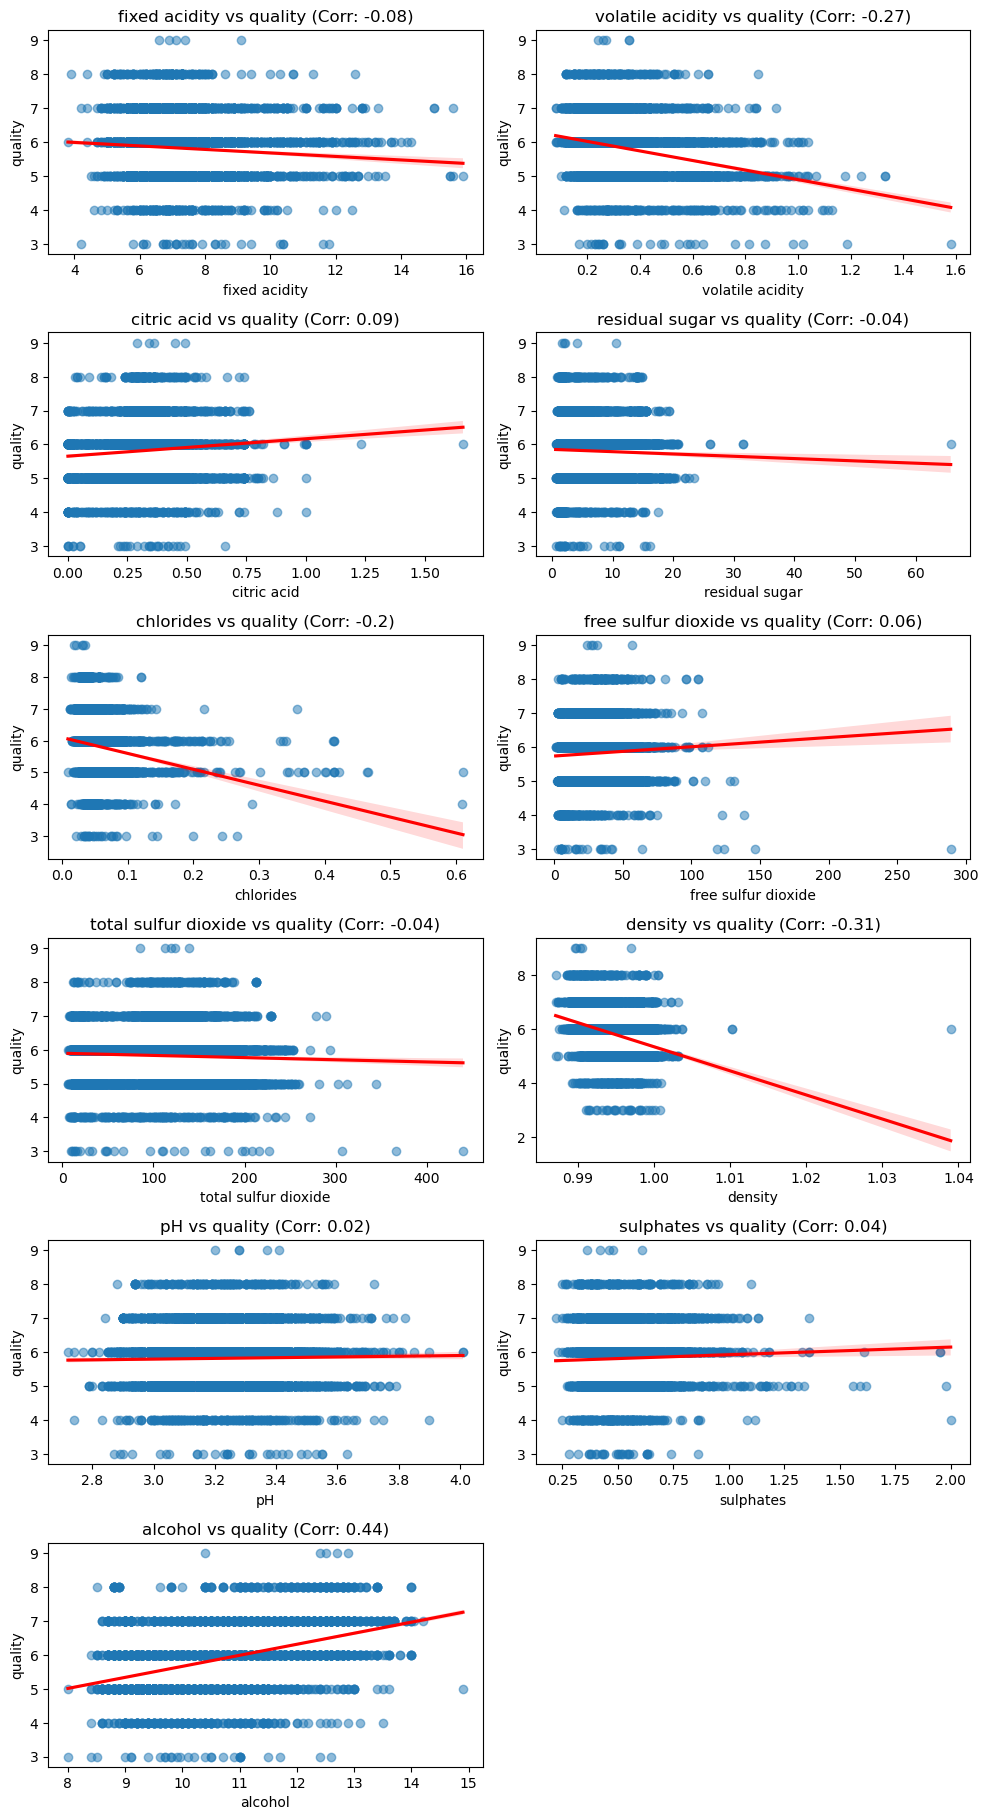

In [ ]:
target = 'quality'
numerical_col = df.select_dtypes(include=["int64", "float64"]).columns
independent_col = [col for col in numerical_col if col not in target]

plt.figure(figsize=(10, len(independent_col) * 3))
for i, feat in enumerate(independent_col, 1):
    plt.subplot(len(independent_col), 2, i)
    sns.regplot(data=df, x=feat, y=target, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
    corr = df[feat].corr(df[target])
    plt.title(f"{feat} vs {target} (Corr: {round(corr, 2)})")

plt.tight_layout()

# volatile acidity, chlorides, density, and alcohol have the highest correlation with quality

<Figure size 640x480 with 0 Axes>

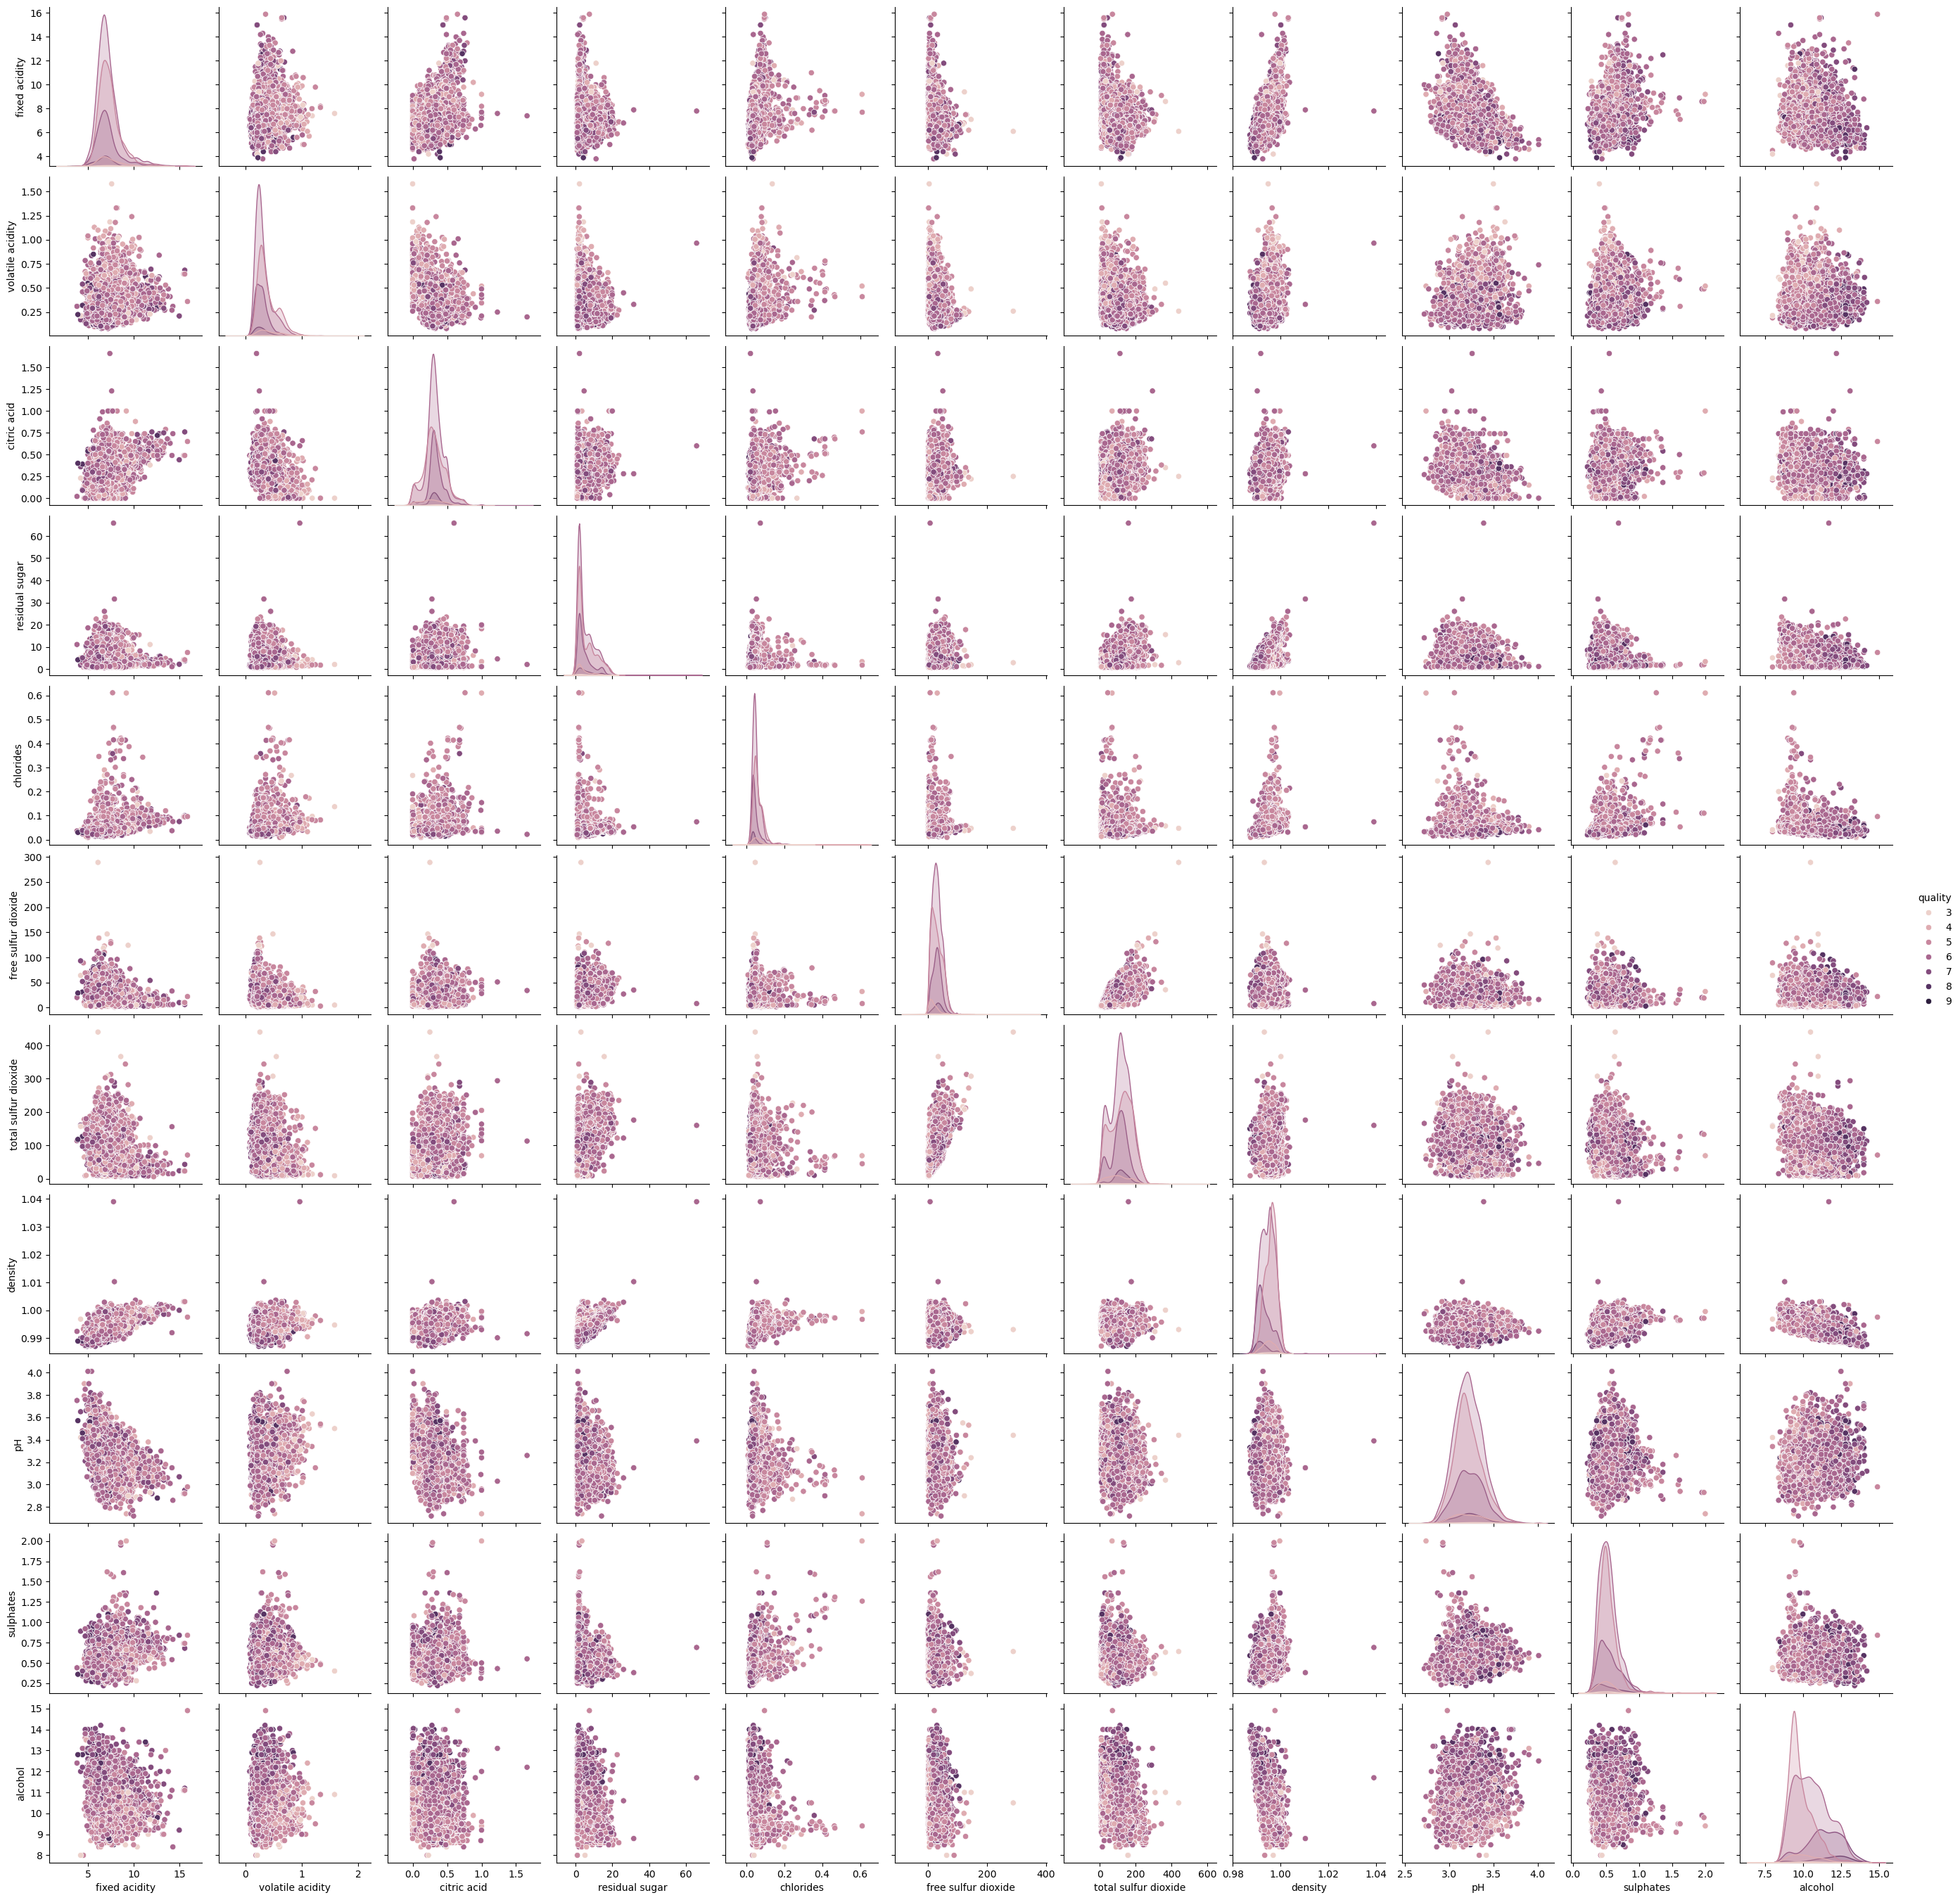

In [16]:
plt.figure()
sns.pairplot(df, hue="quality")
plt.show()

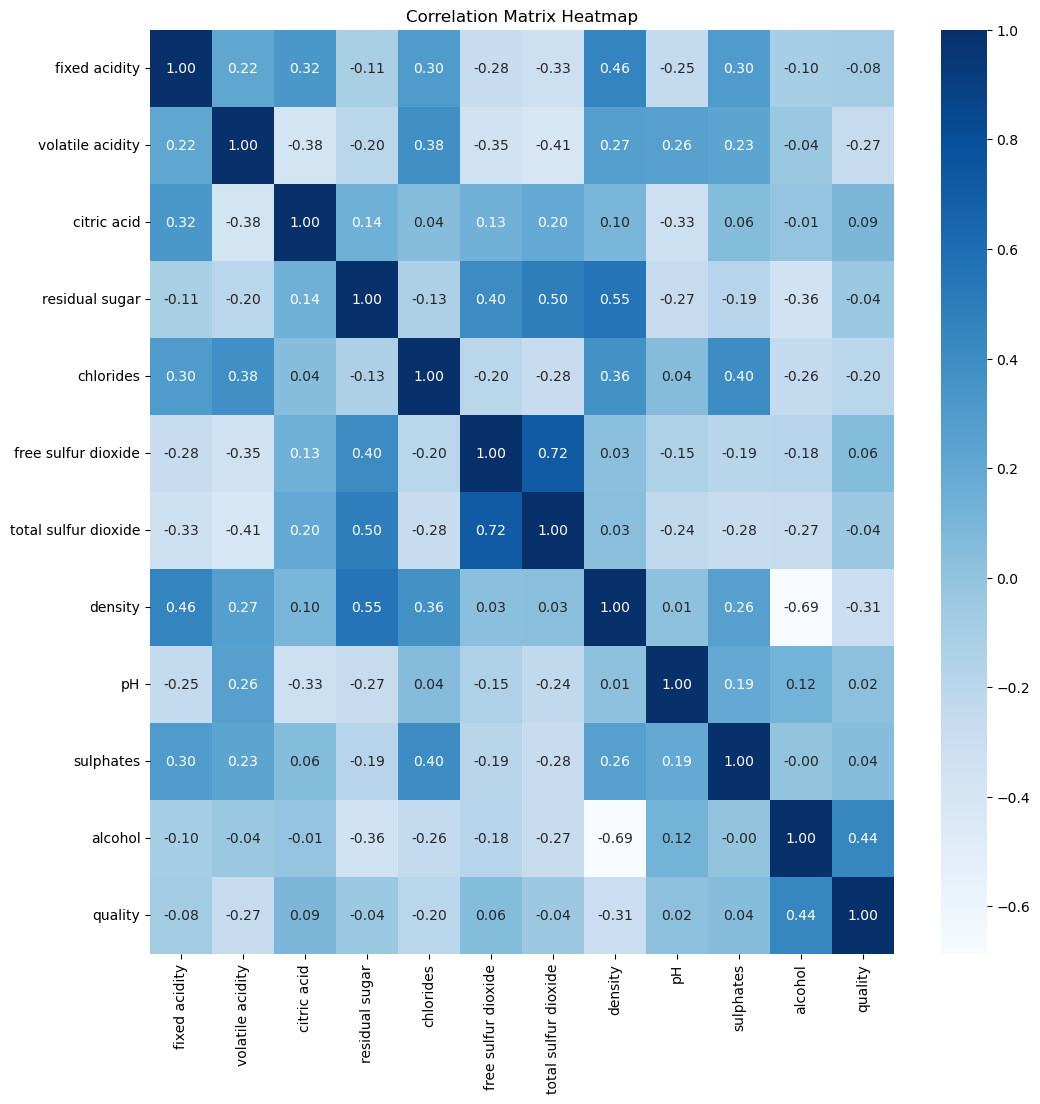

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.select_dtypes(include=["int64", "float64"]).corr(), annot=True, fmt='.2f', cmap='Blues')
plt.title('Correlation Matrix Heatmap')
plt.show()

# total sulfur dioxide and free sulfur dioxide have high correlation